In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset with specified encoding
data = pd.read_csv('/content/Global hunger index.csv', encoding='ISO-8859-1')

# Data Preprocessing
# Display the first few rows of the DataFrame
print(data.head())

# Display the column names
print(data.columns)

# Remove unnecessary columns
data = data.drop(['Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11'], axis=1)

# Display the shape of the DataFrame
print(data.shape)

# Display information about the DataFrame
print(data.info())

# Display descriptive statistics for numerical columns
print(data.describe())

# Check for missing values
print(data.isnull().any())

# Summarize the missing values
print(data.isnull().sum())

# Display the column names
print(data.columns)

# Convert numeric columns to the appropriate data type
data['2000'] = pd.to_numeric(data['2000'], errors='coerce')
data['2007'] = pd.to_numeric(data['2007'], errors='coerce')
data['2014'] = pd.to_numeric(data['2014'], errors='coerce')
data['2022'] = pd.to_numeric(data['2022'], errors='coerce')

# Convert Country column to list
country_list = data['Country'].tolist()
print(country_list)


  Rank               Country  2000 2007 2014 2022  Unnamed: 6  Unnamed: 7  \
0    1               Belarus    <5   <5   <5   <5         NaN         NaN   
1    2  Bosnia & Herzegovina   9.3  6.6   <5   <5         NaN         NaN   
2    3                 Chile    <5   <5   <5   <5         NaN         NaN   
3    4                 China  13.3  7.8   <5   <5         NaN         NaN   
4    5               Croatia    <5   <5   <5   <5         NaN         NaN   

   Unnamed: 8  Unnamed: 9  Unnamed: 10  Unnamed: 11  
0         NaN         NaN          NaN          NaN  
1         NaN         NaN          NaN          NaN  
2         NaN         NaN          NaN          NaN  
3         NaN         NaN          NaN          NaN  
4         NaN         NaN          NaN          NaN  
Index(['Rank', 'Country', '2000', '2007', '2014', '2022', 'Unnamed: 6',
       'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11'],
      dtype='object')
(133, 6)
<class 'pandas.core.frame.Data

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px

# Load the dataset with specified encoding
df = pd.read_csv('/content/Global hunger index.csv', encoding='ISO-8859-1')

# Remove unnecessary columns
df = df.drop(['Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11'], axis=1)

# Convert numeric columns to the appropriate data type
df['2000'] = pd.to_numeric(df['2000'], errors='coerce')
df['2007'] = pd.to_numeric(df['2007'], errors='coerce')
df['2014'] = pd.to_numeric(df['2014'], errors='coerce')
df['2022'] = pd.to_numeric(df['2022'], errors='coerce')

# Creating traces for each country
data = []
for index, row in df.iterrows():
    years = row.index[2:]  # Extract years from column names
    gh_index = row.values[2:]
    trace = go.Scatter(x=years, y=gh_index, name=row['Country'])
    data.append(trace)

# Creating layout
layout = go.Layout(
    title='Trend of Global Hunger Index for All Countries',
    xaxis=dict(title='Year'),
    yaxis=dict(title='Global Hunger Index')
)

# Creating figure and plotting
fig = go.Figure(data=data, layout=layout)
fig.show()

# Filter the DataFrame for the selected countries
selected_countries = df.copy()

# Convert the columns to numeric data types
selected_countries[['2000', '2007', '2014', '2022']] = selected_countries[['2000', '2007', '2014', '2022']].apply(pd.to_numeric, errors='coerce')

# Remove countries with missing values
selected_countries.dropna(subset=['2000', '2007', '2014', '2022'], inplace=True)

# Sorting countries based on the latest hunger index (2022)
sorted_countries = selected_countries.sort_values('2022', ascending=False)

# Creating the horizontal bar chart with custom colors
fig = px.bar(sorted_countries, y='Country', x='2022', orientation='h',
             labels={'2022': 'Hunger Index'}, title='Comparison of Hunger Levels of All Countries',
             color='2022', color_continuous_scale='blugrn')
fig.update_layout(showlegend=False)

fig.show()

# Creating a table ranking countries based on the hunger index
ranked_countries = sorted_countries[['Country', '2022']].copy()
ranked_countries['Rank'] = ranked_countries['2022'].rank(ascending=False)
ranked_countries = ranked_countries.sort_values('Rank')
ranked_countries.reset_index(drop=True, inplace=True)
ranked_countries.index += 1  # Start rank from 1 instead of 0

print("Ranked Countries Based on Hunger Index:")
print(ranked_countries)


Ranked Countries Based on Hunger Index:
                    Country  2022   Rank
1                     Yemen  45.1    1.0
2      Central African Rep.  44.0    2.0
3                Madagascar  38.7    3.0
4    Dem. Rep. of the Congo  37.8    4.0
5                      Chad  37.2    5.0
..                      ...   ...    ...
97                 Mongolia   5.7   97.5
98                  Georgia   5.7   97.5
99               Uzbekistan   5.6   99.0
100                  Brazil   5.4  100.0
101    United Arab Emirates   5.3  101.0

[101 rows x 3 columns]


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px

# Load the dataset with specified encoding
df = pd.read_csv('/content/Global hunger index.csv', encoding='ISO-8859-1')

# Remove unnecessary columns
df = df.drop(['Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11'], axis=1)

# Convert numeric columns to the appropriate data type
df['2000'] = pd.to_numeric(df['2000'], errors='coerce')
df['2007'] = pd.to_numeric(df['2007'], errors='coerce')
df['2014'] = pd.to_numeric(df['2014'], errors='coerce')
df['2022'] = pd.to_numeric(df['2022'], errors='coerce')

# Filter the DataFrame for the selected countries from various continents
countries = df['Country'].unique()  # Use all unique countries
selected_countries = df[df['Country'].isin(countries)].copy()

# Remove countries with missing values
selected_countries.dropna(subset=['2000', '2007', '2014', '2022'], inplace=True)

# Sorting countries based on the latest hunger index (2022)
sorted_countries = selected_countries.sort_values('2022', ascending=False)

# Plotting the top 10 and last 10 countries
top_10_countries = sorted_countries.head(10)
bottom_10_countries = sorted_countries.tail(10)

# Concatenating top and bottom countries
selected_countries = pd.concat([top_10_countries, bottom_10_countries])

# Creating the horizontal bar chart with custom colors
fig = px.bar(selected_countries, y='Country', x='2022', orientation='h',
             labels={'2022': 'Hunger Index'}, title='Comparison of Hunger Levels of Top and Bottom 10 Countries',
             color='2022', color_continuous_scale='blugrn')
fig.update_layout(showlegend=False)

fig.show()


In [46]:
import pandas as pd
import plotly.graph_objects as go

# Define the country-region mapping
country_region_mapping = {
    'Belarus': 'Europe', 'Bosnia & Herzegovina': 'Europe', 'Chile': 'South America', 'China': 'Asia', 'Croatia': 'Europe',
    'Estonia': 'Europe', 'Hungary': 'Europe', 'Kuwait': 'Middle East', 'Latvia': 'Europe', 'Lithuania': 'Europe',
    'Montenegro': 'Europe', 'North Macedonia': 'Europe', 'Romania': 'Europe', 'Serbia': 'Europe', 'Slovak Republic': 'Europe',
    'Türkiye': 'Middle East', 'Uruguay': 'South America', 'Costa Rica': 'North America', 'United Arab Emirates': 'Middle East',
    'Brazil': 'South America', 'Uzbekistan': 'Asia', 'Georgia': 'Asia', 'Mongolia': 'Asia', 'Bulgaria': 'Europe',
    'Kazakhstan': 'Asia', 'Tunisia': 'Africa', 'Albania': 'Europe', 'Russian Federation': 'Europe',
    'Iran (Islamic Republic of)': 'Middle East', 'Saudi Arabia': 'Middle East', 'Argentina': 'South America', 'Algeria': 'Africa',
    'Armenia': 'Asia', 'Moldova': 'Europe', 'Jamaica': 'North America', 'Azerbaijan': 'Asia', 'Ukraine': 'Europe',
    'Colombia': 'South America', 'Peru': 'South America', 'Kyrgyz Republic': 'Asia', 'Paraguay': 'South America',
    'Mexico': 'North America', 'Panama': 'North America', 'El Salvador': 'North America', 'Dominican Republic': 'North America',
    'Trinidad & Tobago': 'North America', 'Fiji': 'Oceania', 'Morocco': 'Africa', 'Turkmenistan': 'Asia', 'Suriname': 'South America',
    'Guyana': 'South America', 'Lebanon': 'Middle East', 'Jordan': 'Middle East', 'Cabo Verde': 'Africa', 'Viet Nam': 'Asia',
    'Thailand': 'Asia', 'Egypt': 'Africa', 'Malaysia': 'Asia', 'South Africa': 'Africa', 'Oman': 'Middle East',
    'Bolivia (Plurinational State of)': 'South America', 'Honduras': 'North America', 'Mauritius': 'Africa', 'Nicaragua': 'North America',
    'Sri Lanka': 'Asia', 'Iraq': 'Middle East', 'Ghana': 'Africa', 'Tajikistan': 'Asia', 'Philippines': 'Asia', 'Ecuador': 'South America',
    'Myanmar': 'Asia', 'Senegal': 'Africa', 'Eswatini': 'Africa', "Côte d'Ivoire": 'Africa', 'Cambodia': 'Asia', 'Gabon': 'Africa',
    'Indonesia': 'Asia', 'Namibia': 'Africa', 'Guatemala': 'North America', 'Cameroon': 'Africa', 'Nepal': 'Asia', 'Lao PDR': 'Asia',
    'Solomon Islands': 'Oceania', 'Bangladesh': 'Asia', 'Venezuela (Bolivarian Republic of)': 'South America', 'Botswana': 'Africa',
    'Gambia': 'Africa', 'Malawi': 'Africa', 'Mauritania': 'Africa', 'Djibouti': 'Africa', 'Benin': 'Africa', 'Togo': 'Africa',
    'Mali': 'Africa', 'Kenya': 'Africa', 'Tanzania (United Republic of)': 'Africa', 'Burkina Faso': 'Africa', 'Korea (DPR)': 'Asia',
    'Angola': 'Africa', 'Pakistan': 'Asia', 'Papua New Guinea': 'Oceania', 'Comoros': 'Africa', 'Rwanda': 'Africa', 'Nigeria': 'Africa',
    'Ethiopia': 'Africa', 'Congo (Republic of)': 'Africa', 'Sudan': 'Africa', 'India': 'Asia', 'Zambia': 'Africa', 'Afghanistan': 'Asia',
    'Timor-Leste': 'Asia', 'Guinea-Bissau': 'Africa', 'Sierra Leone': 'Africa', 'Lesotho': 'Africa', 'Liberia': 'Africa', 'Niger': 'Africa',
    'Haiti': 'North America', 'Guinea, Mozambique, Uganda, and Zimbabwe': 'Africa', 'Chad': 'Africa', 'Dem. Rep. of the Congo': 'Africa',
    'Madagascar': 'Africa', 'Central African Rep.': 'Africa', 'Yemen': 'Middle East', 'Burundi, Somalia, South Sudan, and Syrian Arab Rep.': 'Africa'
}

# Add a new column 'Region' to the DataFrame
df['Region'] = df['Country'].map(country_region_mapping)

# Calculate the average hunger index by region
average_hunger_index = df.groupby('Region')['2022'].mean().sort_values(ascending=False)

# Plot the 3D pie chart
fig = go.Figure(data=[go.Pie(labels=average_hunger_index.index, values=average_hunger_index.values,
                             textinfo='label+percent',
                             pull=[0.1, 0, 0, 0, 0, 0, 0, 0],
                             hole=0.3)])
fig.update_layout(title_text="Average Hunger Index by Region Over the Years",
                  scene=dict(aspectmode="data"),
                  showlegend=True)
fig.show()



Prediction Model for Afghanistan we can do it for different countries and then can do futher analysis.


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

      Afghanistan  Predicted Index
Rank        109.0              NaN
2000         50.3              NaN
2007         38.7              NaN
2014         30.6              NaN
2022         29.9              NaN
5             NaN        71.405924
6             NaN        98.217263
7             NaN       126.718981
8             NaN       161.860830
9             NaN       161.098504
10            NaN       156.662601
11            NaN       143.638246
12            NaN       107.433497
13            NaN        85.853346
14            NaN        66.383414
15            NaN        49.856935
16            NaN        59.278195
17            NaN        70.958065
18            NaN        88.693564
19            NaN       116.727208
20            NaN       130.844069
21            NaN       140.661526
22            NaN       144.091557
23            NaN       130.130832
24            NaN       116.020910
25            NaN        99.299510
26            NaN        80.271912
27            NaN   

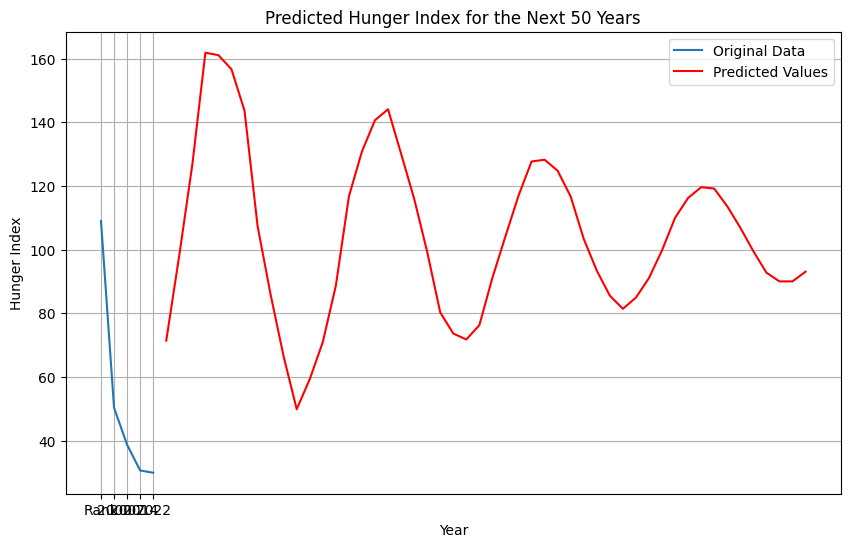

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Load the dataset with specified encoding
data = pd.read_csv('/content/Global hunger index.csv', encoding='ISO-8859-1')

# Data Preprocessing
# Remove unnecessary columns
data = data.drop(['Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11'], axis=1)

# Convert numeric columns to the appropriate data type
data['2000'] = pd.to_numeric(data['2000'], errors='coerce')
data['2007'] = pd.to_numeric(data['2007'], errors='coerce')
data['2014'] = pd.to_numeric(data['2014'], errors='coerce')
data['2022'] = pd.to_numeric(data['2022'], errors='coerce')

# Transpose the DataFrame to set 'Country' as index
data = data.set_index('Country').T

# Load the original data
df = data.copy()

# Convert the data type of the 'Afghanistan' column to numeric
df['Afghanistan'] = pd.to_numeric(df['Afghanistan'], errors='coerce')

# Train the ARIMA model
model = ARIMA(df['Afghanistan'], order=(5,1,0))  # Example order, you may need to tune this
model_fit = model.fit()

# Make predictions for the next 50 years
forecast = model_fit.forecast(steps=50)

# Concatenate the original data and the forecast into a single DataFrame
forecast_df = pd.concat([df['Afghanistan'], forecast.rename('Predicted Index')], axis=1)

# Print the current values and the predicted index over the next 50 years
print(forecast_df)

# Plot the original data and predicted values
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Afghanistan'], label='Original Data')
plt.plot(forecast.index, forecast, label='Predicted Values', color='red')
plt.xlabel('Year')
plt.ylabel('Hunger Index')
plt.title('Predicted Hunger Index for the Next 50 Years')
plt.legend()
plt.grid(True)
plt.show()
